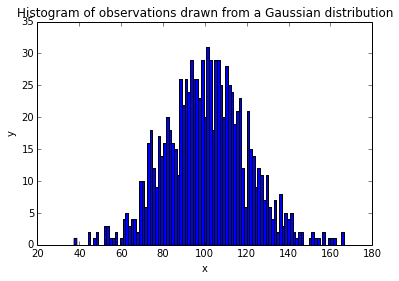

In [6]:
%matplotlib inline

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


#Q1) How do you test decide whether a given set of real-valued 
# observations are drawn from a Gaussian distribution? 

#[M.R.] Take the histogram of the set of values. 
#The histogram can be used to determine the distribution of a given set of values.

# Gaussian Distribution Histogram
dist_size = 1000
mu, sigma = 100, 20 #sigma is std, mu is mean
dist_normal = np.random.normal(loc=mu, scale=sigma, size=dist_size)
n, bins, pathces = plt.hist(dist_normal, bins=100, normed=0)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Histogram of observations drawn from a Gaussian distribution')
plt.show()


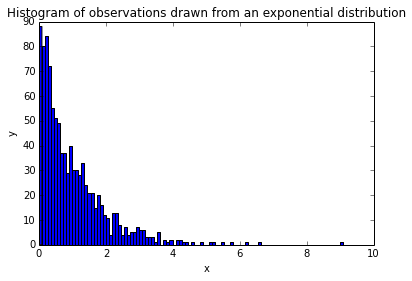

In [7]:
# Non-Gaussian Distribution Histogram
dist_exponential = np.random.exponential(size=dist_size)
n, b, patches = plt.hist(dist_exponential, bins=100, normed=0)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Histogram of observations drawn from an exponential distribution')
plt.show()

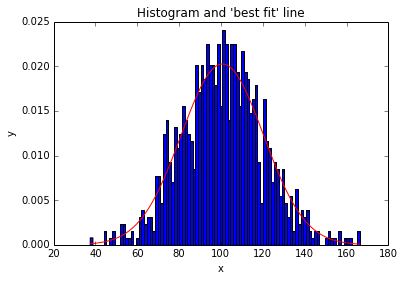

In [8]:
# Find the parameters of the distribution (assuming the distribution parameters are unknown).
mean = np.mean(dist_normal)
std = np.std(dist_normal)
y = mlab.normpdf(bins, mean, std)
plt.hist(dist_normal, bins=100, normed=1)
plt.plot(bins, y, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Histogram and 'best fit' line")
plt.show()


In [ ]:
#Q2) Given a streaming time series of real-valued, scalar observations,
# describe an online algorithm for determining a linear Gaussian
# model of these observations as a function of time step.

# [M.R.] To derive a linear Gaussian model, we simply need the mean (cumulative sum) and the standard
# deviation (cumulative sum squared) of the observations.
# Some assumptions:
#    1. We only get one observation per time step.
#    2. The input to the online algorithm is the observation.
#    3. The algorithm outputs model parameters for a given
#       time step ('t').

# In the following code, use 'addObservation(x)' everytime a new
# observation comes in. Use 'getModelParameters(t)' to find the model
# parameters at time step 't'.
# Global variables
# 'cumSum' and 'cumSumSq' have to be lists because
# parameters are a function of the time step.

n = 0 # Time step
cumSum = [] # cumulative sum
cumSumSq = [] # cumulative sum squared

def addObservation(x):
    """
    Updates the cumulative sum and cumulative sum squared,
    which can be used to compute model parameters.
    """
    if n == 0:
        cumSum.append(x)
        cumSumSq.append(x*x)
    else:
        cumSum.append(x+cumSum[n])
        cumSumSq.append(x*x + cumSumSq[n])
    n+=1
    
def getModelParameters(t):
    """
    Returns the linear Gaussian model parameters (mean and standard deviation)
    at the time step 't'.
    Assuming the time step goes from 2 to n - 1.
    """
    if (t < 2 or t >= n):
        # Error
        return None, None
    sample_mean = cumSum[t]/t
    sample_var_unbiased = (cumSumSq[t] - cumSum[t]*cumSum[t])
    sample_var_unbiased /= (t - 1.0)
    sample_std = np.sqrt(sample_var_unbiased)
    
    return sample_mean, sample_std
    